# Intro to Geospatial Data using Python

## Disclaimer
* Not a GIS expert, just someone with the drive to self learn.
* Going to be talking mostly about Shape (.shp) files but other formats exist (geojson, raster, etc)
* Using Python 3.5, no guarantees everything works on 2.7

## Background
* What is GeoSpatial Data?
* Types of GeoSpatial Data
* What kinds of GeoSpatial Data is available?
* Where to get data?

## Technical
* Getting Set Up
* Reading in Data
* Exploring Data
    * Fields
    * Profiling
    * Visualization
* Filtering
    * Data Attributes
    * Geodesic Features
* Geodesic transformations
    * Units of Measure
    * Projections
* Geodesic Calculations
    * Centroid
    * Distance between points
* Joins/merges
    * Joining tabular data
    * Joining on geodesic features
* Creating new data
    * New Fields
    * New Shapes
* Writing Data

## What is GeoSpatial Data?
The word geospatial is used to indicate that data that has a geographic component to it.  This means that the records in a dataset have locational information tied to them such as geographic data in the form of coordinates, address, city, or ZIP code. GIS data is a form of geospatial data.  Other geospatial data can originate from GPS data, satellite imagery, and geotagging. [1]

![](./img/gislayers.jpg)

[1]: https://www.gislounge.com/difference-gis-geospatial/

## Types of Geospatial Data

## Vector/Polygon Data
* A representation of the world using points, lines, and polygons. 
* Vector models are useful for storing data that has discrete boundaries, such as country borders, land parcels, and streets.
* Common formats are Shape Files, GeoJSON, KML (Keyhole Markup Language)
* Often used by data scientists to calculate additional variables (distance to water in this example) or weight attributes based on area/density.
![](./img/GIS_Shape.jpg)

## Raster Data
* Rasters are digital aerial photographs, imagery from satellites, digital pictures, or even scanned maps
* Common formats are .JPG, .TIF, .GIF or similar format
* Can help answer fuzzy questions like "how many fields were planted in county X vs left fallow?" 
    * This ends up being an image recognition type problem as you are trying to planted vs planted by coloration.
![](./img/GIS_Raster.jpg)

## Tablular Files
* Numeric data is statistical data which includes a geographical component 
* Joined with vector files so the data can be queried and displayed as a layer on a map in a GIS. 
* The most common type of numeric data is demographic data from the US Census.
* Unique Identifiers (Hydrology Number, State, Metropolitan Statistical Area ID, Lat/Long, etc)
* Typically what most data scientists & statisticians work with, columns of attributes/characteristics that describe an customer/town/entity
![](./img/GIS_tabular.jpg)

## What kinds of GeoSpatial Data is available?
![](./img/GIS_Categories.PNG)
### Government
* Local (MetCouncil, Minneapolis School District)
* State (DNR, MN PCA, Hennepin County)
* Federal (Census Bureau, NASA)

### Private
* Energy (Xcel Engery, Centerpoint, etc)
* Technology (Google, Uber, etc)

## Where can I get Minnesota Geospatial Data?
[![MN GeoSpatial Commons](./img/mn_geospatial.PNG)](https://gisdata.mn.gov/)

# Getting Set Up

## Start with Anaconda 3.5
Anaconda is the de facto industry standard for Python Scientific Computing. Without it users are left to manage dependencies, find and compile low level C libraries and generally in for a huge headache. Added bonus is that you don't need administrator privledges to install if you install only for the local user.

### Download Here
[![Download Here](./img/Anaconda_Download.PNG)](https://www.continuum.io/downloads)

![conda-forge](./img/Conda_Forge.PNG)

## Install Additional Libraries

Conda is a packaging tool and installer that aims to do more than what pip does; handle library dependencies outside of the Python packages as well as the Python packages themselves.

## What is Conda Forge?

conda-forge is a github organization containing repositories of conda recipes. Each repository automatically builds its own recipe in a clean and repeatable way on Windows, Linux and OSX. 

Extremely valuable as you don't have to find and compile dependencies (which isn't fun on Linux/OSX and is a *NIGHTMARE* on Windows).

**Enable conda-forge repositories by running following line in Terminal/CMD/Shell of your choice.**

`conda config --add channels conda-forge`

## Python Geospatial Libraries Covered in Notebook

* [geopandas][] - Working with spatial data is fun again!
* [shapely][] - For geometry handling
* [rtree][] - For efficiently querying spatial data
* [pyshp][] - For reading and writing shapefiles (in _pure_ Python)
* [pyproj][] - For conversions between projections
* [fiona][] - For making it _easy_ to read/write geospatial data formats
* [ogr/gdal][] - For reading, writing, and transforming geospatial data formats
* [geopy][] - For geolocating and things like that
* [pysal][] -  Spatial econometrics, exploratory spatial and spatio-temporal data analysis, spatial clustering (and more)
* [descartes][] - For plotting geometries in matplotlib

[pandas]: http://pandas.pydata.org/
[geopandas]: https://github.com/kjordahl/geopandas
[shapely]: https://pypi.python.org/pypi/Shapely
[rtree]: http://toblerity.github.io/rtree/
[geopy]: https://code.google.com/p/geopy/
[ogr/gdal]: https://pypi.python.org/pypi/GDAL/
[fiona]: http://toblerity.github.io/fiona/
[pysal]: http://pysal.org
[pyproj]: https://code.google.com/p/pyproj/
[pyshp]: https://code.google.com/p/pyshp/
[descartes]: https://pypi.python.org/pypi/descartes

### [Exhaustive List Here](https://github.com/SpatialPython/spatial_python/blob/master/packages.md)

**Install packages by running each line in Terminal/CMD/Shell of your choice**

`conda install geopandas`

`conda install rtree`

`conda install pyshp`

`conda install pyproj`

## Install Additional GitHub Packages
Conda should be your go-to installer but some of the really specific libraries you need to install with Pip

* [pandas-profiling][] - Generates profile reports from a pandas DataFrame
* [geoplotlib][] - For visualizing geographical data and making maps
* [missingno][] - Provides a small toolset of flexible and easy-to-use missing data visualizations 

[pandas-profiling]: https://github.com/JosPolfliet/pandas-profiling
[geoplotlib]: https://github.com/andrea-cuttone/geoplotlib
[missingno]: https://github.com/ResidentMario/missingno



**Install packages by running each line in Terminal/CMD/Shell of your choice**

`pip install https://github.com/JosPolfliet/pandas-profiling/archive/master.zip`

`pip install https://github.com/andrea-cuttone/geoplotlib/archive/master.zip`

`pip install https://github.com/ResidentMario/missingno/archive/master.zip`

# Data Set
## MetroGIS Tax Parcels 2014
![](./img/preview.jpg)

## Extract Data from zipfile

In [1]:
from zipfile import ZipFile

file_list = ['./data/data.zip']

for archive in file_list:
    zfile = ZipFile(archive)
    zfile.extractall('./data/')

## [Review Tax Parcel Meta Data](./data/MetroGIS_Tax_Parcels_2014/metadata/metadata.html)

## [Review Tax Field Descriptions](./data/MetroGIS_Tax_Parcels_2014/metadata/MetroGIS_Regional_Parcels_Attributes_2014.pdf)

# Reading in Data

geopandas can read almost any vector-based spatial data format including ESRI shapefile, GeoJSON files and more

In [1]:
import geopandas as gpd

shp_file = './data/MetroGIS_Tax_Parcels_2014/Parcels2014Hennepin.dbf'

hennepin = gpd.read_file(shp_file)

In [52]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
hennepin.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 427762 entries, 0 to 427761
Data columns (total 70 columns):
ACRES_DEED    427762 non-null float64
ACRES_POLY    427762 non-null float64
AGPRE_ENRD    0 non-null object
AGPRE_EXPD    0 non-null object
AG_PRESERV    427762 non-null object
BASEMENT      111420 non-null object
BLDG_NUM      427762 non-null object
BLOCK         305269 non-null object
CITY          427762 non-null object
CITY_USPS     414475 non-null object
COOLING       157514 non-null object
COUNTY_ID     427762 non-null object
DWELL_TYPE    0 non-null object
EMV_BLDG      427762 non-null float64
EMV_LAND      427762 non-null float64
EMV_TOTAL     427762 non-null float64
FIN_SQ_FT     427762 non-null float64
GARAGE        157514 non-null object
GARAGESQFT    157514 non-null object
GREEN_ACRE    427762 non-null object
HEATING       156532 non-null object
HOMESTEAD     426337 non-null object
HOME_STYLE    152400 non-null object
LANDMARK      0 non-null object
LOT    

# Exploring Data

**Yikes, thats a lot of memory being used just to hold it, let alone do any type of analysis on.**

**Set the index so we can traverse the data faster**

In [4]:
# First filter out rows that don't have unique ID's
hennepin = hennepin[pd.notnull(hennepin['PIN'])]
hennepin = hennepin[pd.notnull(hennepin['COUNTY_ID'])]

In [5]:
hennepin = hennepin.set_index(['COUNTY_ID', 'PIN']).sort_index()

**A lot of the fields are object type, which defaults to** `str` **on import.** `str` **is a not efficient, it contains a ton of additional methods like len(), replace(), etc. All of which we don't really care about right now.**

**Let's treat any column that has a lot of repeat values as** `category` **type.** `category` **type basically just creates a dictionary of words to numbers. A good example of this is** `GREEN_ACRE` **column.**

In [6]:
# get unique list of values from GREEN_ACRE column
list(hennepin['GREEN_ACRE'].unique())

['N', 'Y']

**I don't really want to go through each of the 66 columns so let's create a function that looks for columns that the number of unique values is less than 20% of the total row count. If meet that criteria, convert them to** `category` **type.**

In [7]:
# convert columns with strings to 'categorical' type if the are only 20% unique
def convert_to_categorical(df, cols):
    for col in cols:
        if df[col].dtype == 'object':
            # get number of unique values
            unique_vals = len(df[col].unique())
            unique_ratio = unique_vals / len(df)
            if unique_ratio <= 0.2:
                df[col] = df[col].astype('category')
    return df

In [8]:
hennepin = convert_to_categorical(hennepin, column_list)

NameError: name 'column_list' is not defined

**Oh no! An error!**

**Looks like my logic for converting broke at ** `geometry` **column since** `object` **in this case wasn't referring to a ** `str`** but a **`geom_type`**. Let's run it again without that.**

In [13]:
column_list = list(hennepin.select_dtypes(include=['object']).columns.values)
column_list.remove('geometry')
hennepin = convert_to_categorical(hennepin, column_list)

**Let's see what that did to our memory usage

In [14]:
hennepin.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 427762 entries, (053, 053-0102724110003) to (053, 053-3612123410019)
Data columns (total 68 columns):
ACRES_DEED    427762 non-null float64
ACRES_POLY    427762 non-null float64
AGPRE_ENRD    0 non-null category
AGPRE_EXPD    0 non-null category
AG_PRESERV    427762 non-null category
BASEMENT      111420 non-null category
BLDG_NUM      427762 non-null category
BLOCK         305269 non-null category
CITY          427762 non-null category
CITY_USPS     414475 non-null category
COOLING       157514 non-null category
DWELL_TYPE    0 non-null category
EMV_BLDG      427762 non-null float64
EMV_LAND      427762 non-null float64
EMV_TOTAL     427762 non-null float64
FIN_SQ_FT     427762 non-null float64
GARAGE        157514 non-null category
GARAGESQFT    157514 non-null category
GREEN_ACRE    427762 non-null category
HEATING       156532 non-null category
HOMESTEAD     426337 non-null category
HOME_STYLE    152400 non-null category
LAN

**Wow that halved our memory consumption!**

# Profiling
**Let's get some summary stats on our data**

In [15]:
import pandas_profiling
# look at numeric columns only
pandas_profiling.ProfileReport(hennepin.select_dtypes(exclude=['object', 'category']))

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Number of variables,17
Number of observations,427762
Total Missing (%),0.0%
Total size in memory,55.5 MiB
Average record size in memory,136.0 B
Numeric,8
Categorical,0
Date,0
Text (Unique),1
Rejected,8
Constant value,0


** Looks like some columns are just constant. Let's remove them.**

In [16]:
# get rid of columns with constant value
drop_cols = ['PARC_CODE', 'ACRES_DEED']
hennepin = hennepin.drop(drop_cols, axis=1)

# Missing Data?

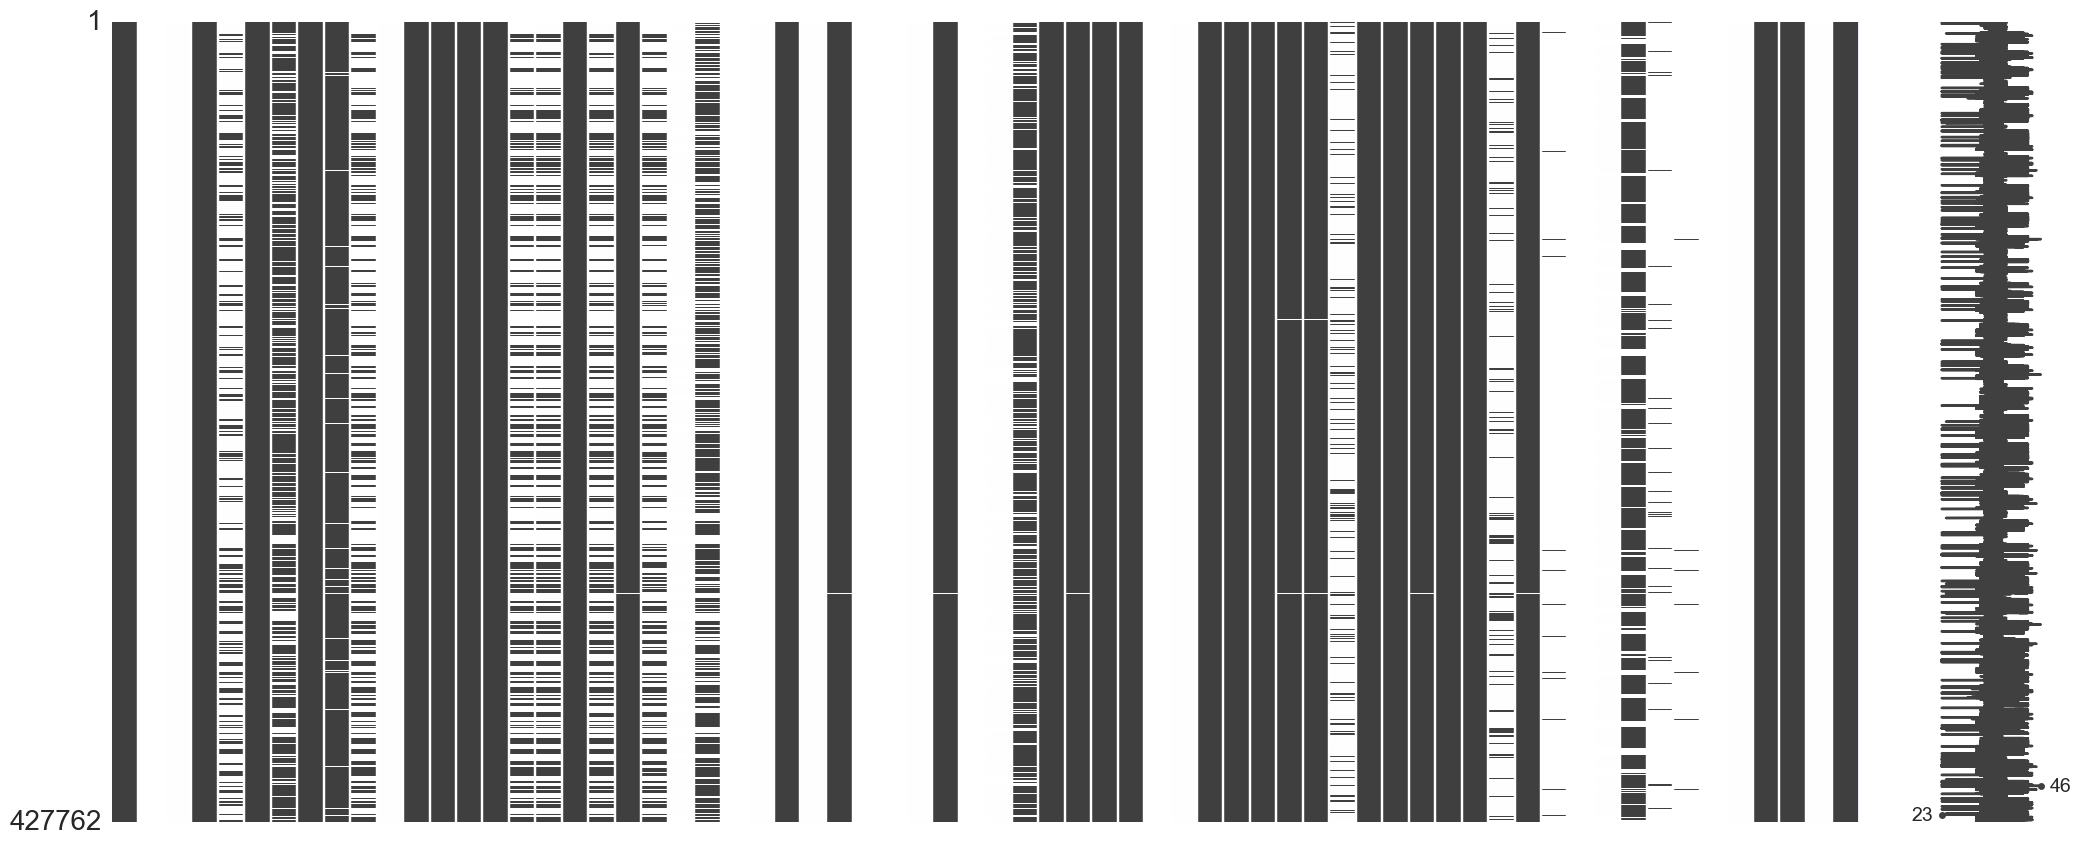

In [17]:
import missingno as msno

msno.matrix(hennepin)

**OK looks like some columns are barely populated. Let's remove them.**

In [18]:
def delete_near_null(df, cols, populated_threshold=0.01):
    """iterate through columns and remove columns with almost null columns"""
    for col in cols:
        # drop col if unique values is 1
        non_null_rows = df[col].count()
        total_rows = len(df[col])
        populated_ratio = non_null_rows/total_rows
        if populated_ratio <= populated_threshold:
            print('Columns Removed')
            del df[col]
            print(col)
    return df

In [19]:
column_list = list(hennepin.select_dtypes(include=['object']).columns.values)
column_list.remove('geometry')
hennepin = delete_near_null(hennepin, column_list)

# Filtering on Geodesic Features

**The dataset also has **`Point`** information. **

**These are sometimes there to help break up condos into individually owned units and tax each seperately. For ease of use and sanity I'm going to exclude them.**

**You can also have the following** `geom_types`
* Points / Multi-Points
* Lines / Multi-Lines
* Polygons / Multi-Polygons

In [20]:
# filter out points
hennepin = hennepin[hennepin['geometry'].geom_type != 'Point']

**Geospatial Joins and Searchs are computationally expensive. **

**If you can it helps to break up your data into pieces and process them iteratively. For this example we will just do Minneapolis, but you could write a loop to do each city at a time.**

In [21]:
# filter to minneapolis
mpls = hennepin[hennepin['CITY'] == 'MINNEAPOLIS']

In [22]:
hennepin.shape

(427762, 66)

In [31]:
mpls.shape

(129889, 66)

**Great we have 25% of the data we started with, that will help speed things along.**

# Joins / Merges

**Ok enough about taxes. Let's find properties that are adjacent to Lake Calhoun!**

**Read in the MetCount Lakes & Rivers Open Water Features shape file**

## [Review Lakes & Rivers Meta Data](./data/MetCouncil_Lakes_Rivers/metadata/metadata.html)

In [38]:
shp_file = './data/MetCouncil_Lakes_Rivers/LakesAndRivers.dbf'

water_df = gpd.read_file(shp_file)

**Hmm lots of water features don't have names. These can be seasonal wetlands, retention ponds and other small water features.**

In [39]:
water_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 8 columns):
ALT_NAME      210 non-null object
AREA_ACRES    2349 non-null float64
NAME_DNR      1588 non-null object
OWF_ID        2349 non-null object
SYSTEM        2349 non-null object
Shape_Area    2349 non-null float64
Shape_Leng    2349 non-null float64
geometry      2349 non-null object
dtypes: float64(3), object(5)
memory usage: 146.9+ KB


**Always a good habit to set the index**

In [40]:
water_df = water_df.set_index(['OWF_ID']).sort_index()

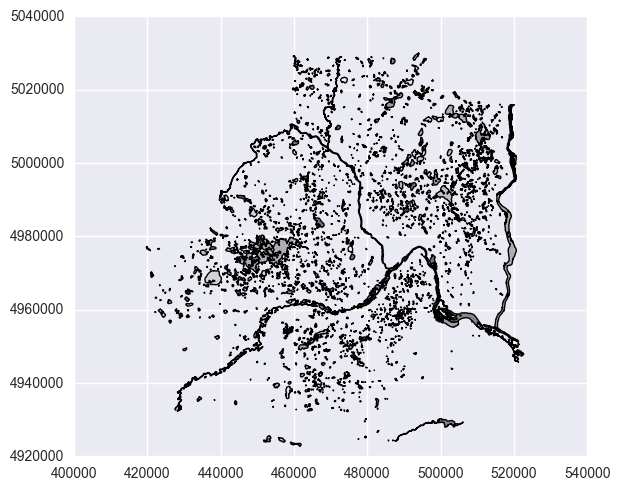

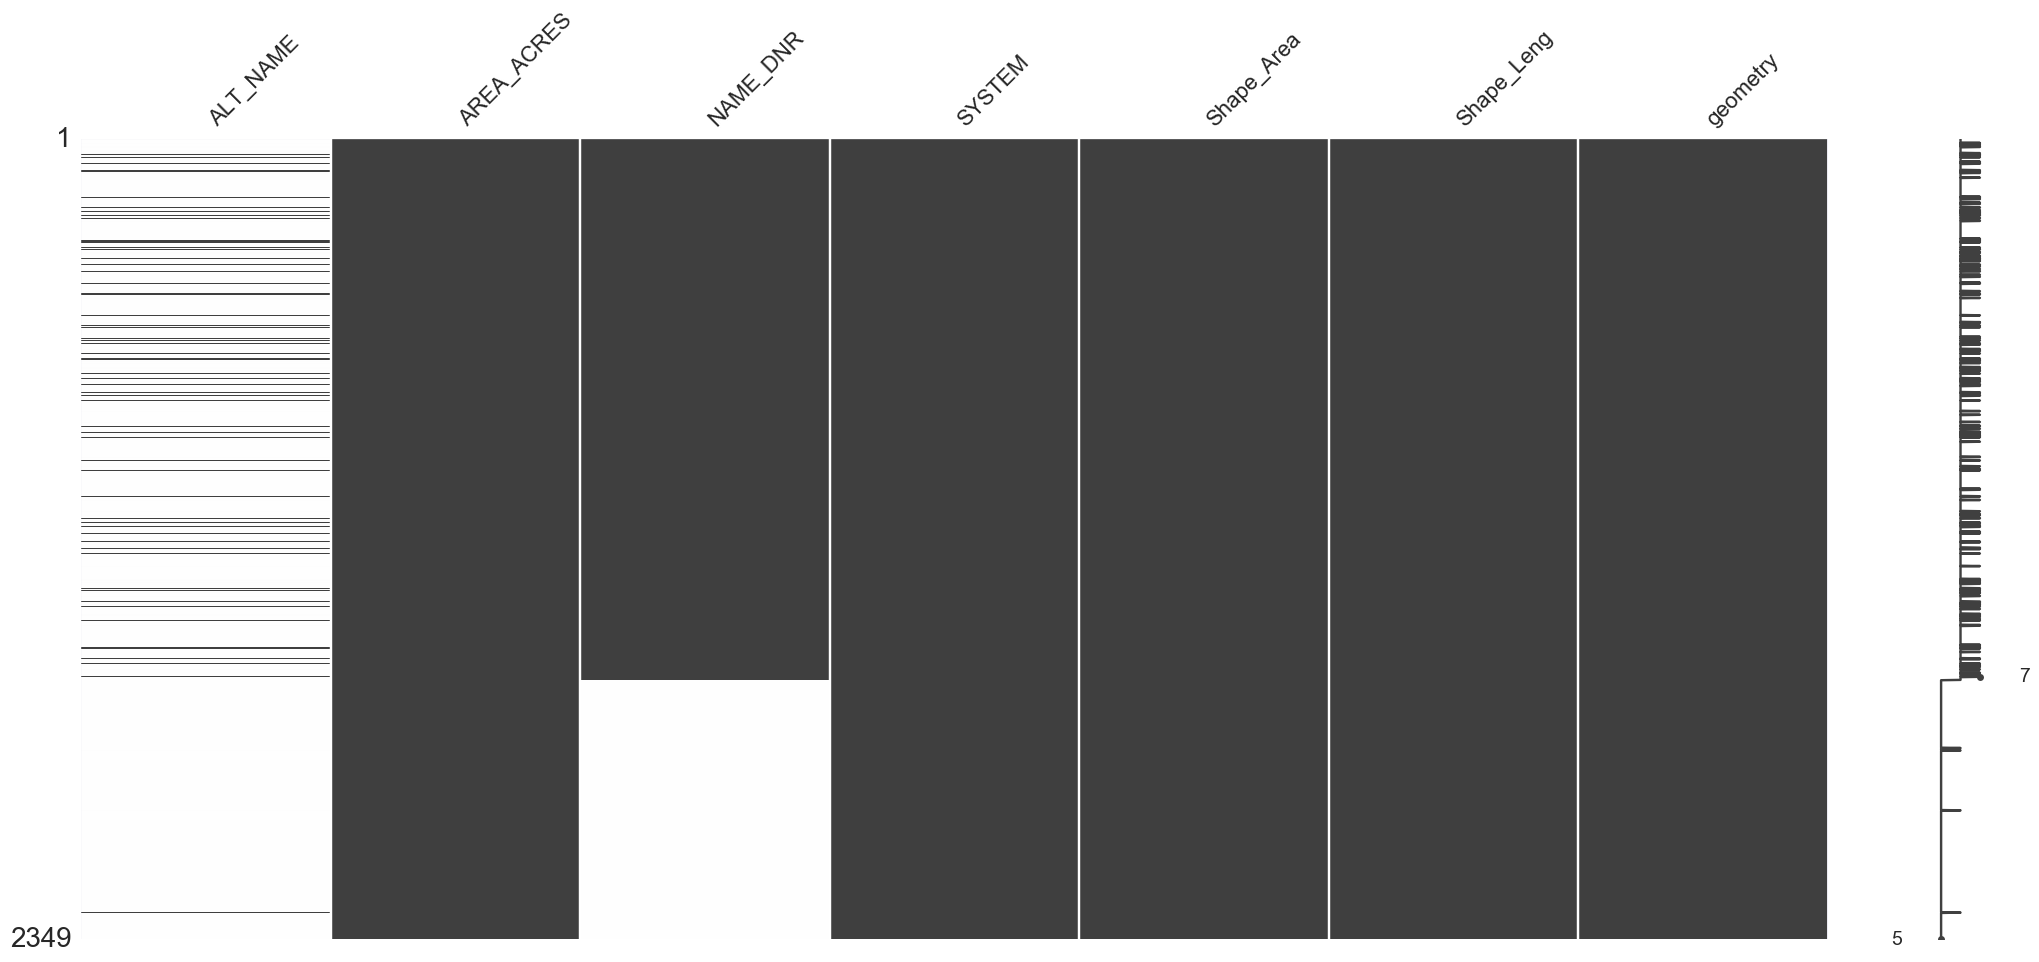

In [41]:
msno.matrix(water_df)

**Let's plot what we've got. This is a much smaller file than the tax parcels so it will be pretty fast.**

In [42]:
water_df.plot()

# Geospatial Transformations

**Remember when I said that geospatial calculations are expensive? **

**Well they still are. So again, split your work up and loop it if you need to do multiples.**

**Let's filter the data down to any lakes that are named 'Calhoun'**

In [141]:
# cedar lake
cedar_lake = water_df[water_df['NAME_DNR'] == 'Cedar']
cedar_lake

,ALT_NAME,AREA_ACRES,NAME_DNR,SYSTEM,Shape_Area,Shape_Leng,geometry
OWF_ID,,,,,,,
27003900,None,168.41,Cedar,Lake,6.815421e+05,4803.870607,"POLYGON ((474663.9454 4979190.5593, 474684.879..."
70009100,None,793.48,Cedar,Lake,3.211136e+06,11307.426102,"POLYGON ((458834.4773 4938960.6654, 458842.693..."


**There are two lakes named Cedar in the dataset, which one?**

**We can look at a given lake's shape to see if it's what we are expecting.**

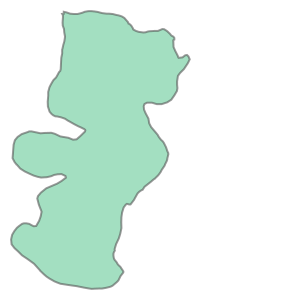

In [128]:
cedar_lake['geometry'].iloc[0]

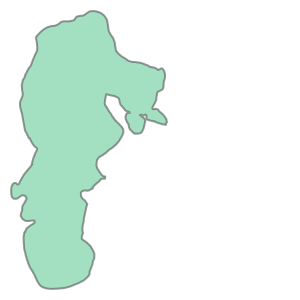

In [129]:
cedar_lake['geometry'].iloc[1]

**Let's filter our set to use the first lake**

In [143]:
cedar_lake = cedar_lake.iloc[[0]]

In [144]:
cedar_lake

,ALT_NAME,AREA_ACRES,NAME_DNR,SYSTEM,Shape_Area,Shape_Leng,geometry
OWF_ID,,,,,,,
27003900,None,168.41,Cedar,Lake,681542.105331,4803.870607,"POLYGON ((474663.9454 4979190.5593, 474684.879..."


**If we want to get properties next to Cedar Lake, recall that all the way around the lake is a public trail, so we need to expand our search beyond that.**

**We can accomplish this by 'buffering' or making the shape bigger in all directions. Let's do 100m for good measure.**

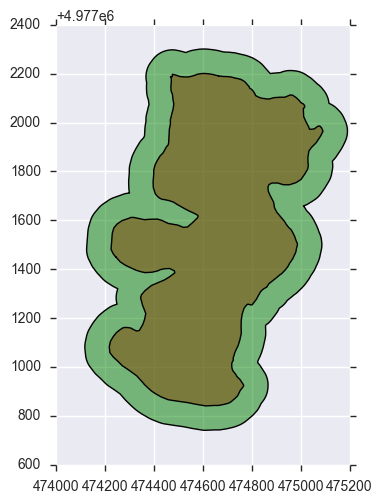

In [146]:
buffered_cedar_lake = cedar_lake.buffer(100)
ax = cedar_lake.plot(color='red');

buffered_cedar_lake.plot(ax=ax, color='green');

**For now we don't really care about any of the other attributes attached to this lake, we just care about its shape, so let's just get the **`Polygon`** to see where their are overlaps with properties.**

In [147]:
buffered_cedar_poly = buffered_cedar_lake.iloc[0]

**Now this next section is a bit complicated but is super fast. Using the **`rtree` **library you can quickly narrow down your search.**

**First step is to set the spatial index of the geospatial dataset you wish to search.**

In [148]:
spatial_index = mpls.sindex

**Next I want you to invision how complicated it would be to determine if a weird shape is inside another weird shape.**

**Wouldn't it be easier to just filter out the vast majority by seeing if a point is inside a rectangle?**

**Yes, yes it is.**

**A Bounding Box makes the smallest possible rectangle that completely encloses your polygon.**

**It is just a tuple of the Xmin, Xmax, Ymin, Ymax**

In [149]:
cedar_bb = buffered_cedar_poly.bounds
cedar_bb

(474116.7938611487, 4977740.731593291, 475191.1664816106, 4979300.6081)

**Now we find all of the index values of the Minneapolis Tax Parcels that intersect with this bounding box.**

In [150]:
possible_matches_index = list(spatial_index.intersection(cedar_bb))

**Now we can select those parcels by their index values**

In [151]:
possible_matches = mpls.iloc[possible_matches_index]
possible_matches.shape

(457, 66)

**Now that was fairly quick and we've gone from 100k+ records down to a handful.**

**Next we look at those that actually touch that 100m buffer around Cedar Lake**

In [152]:
precise_matches = possible_matches[possible_matches.intersects(buffered_cedar_poly)]
precise_matches.shape

(208, 66)

**Also fairly fast and look we are left with 208 parcels that are within 100m of Cedar Lake!**

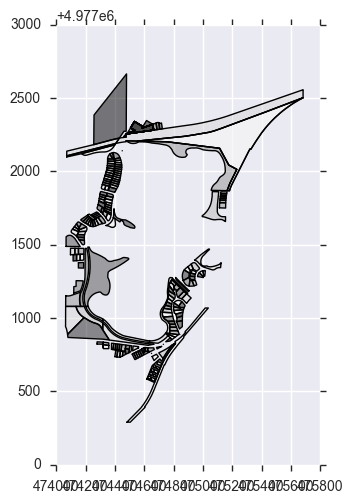

In [153]:
precise_matches.plot()

**Let's Make a column that these Parcels are adjacent to the lake**

In [164]:
precise_matches['LAKE_NAME'] = 'Cedar Lake'

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


# Joining Tablular Data to Geospatial Data

**Now let's append some Lake Quality to these parcels surrounding Lake Calhoun!**

## [Review Lake Quality Meta Data](./data/MetCouncil_Lake_Quality_1999_2014/metadata.pdf)

In [165]:
txt_file = './data/MetCouncil_Lake_Quality_1999_2014/MetCouncil_Lake_Quality_1999_2014.txt'
lake_qual = pd.read_csv(txt_file, sep='\t', parse_dates=['START_DATE', 'END_DATE'])

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (16,19,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [166]:
lake_qual = lake_qual.set_index(['DNR_ID_Site_Number', 'START_DATE']).sort_index()

In [167]:
lake_qual.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 48257 entries, (02000300-01, 1980-06-17 00:00:00) to (99002487-01, 2005-10-10 00:00:00)
Data columns (total 31 columns):
PROJECT_ID                            48257 non-null int64
DATA_SET_TITLE                        48257 non-null object
LAKE_NAME                             48257 non-null object
CITY                                  48257 non-null object
COUNTY                                48257 non-null object
MAJOR_WATERSHED                       48257 non-null object
WATER_PLANNING_AUTHORITY              48257 non-null object
LAKE_SITE_NUMBER                      48257 non-null int64
START_HOURMIN24                       48257 non-null object
END_DATE                              48257 non-null datetime64[ns]
END_HOURMIN24                         48257 non-null object
SAMPLE_DEPTH_IN_METERS                48257 non-null float64
Seasonal_Lake_Grade_RESULT            3088 non-null float64
Seasonal_Lake_Grade_QUALIFIER         3088

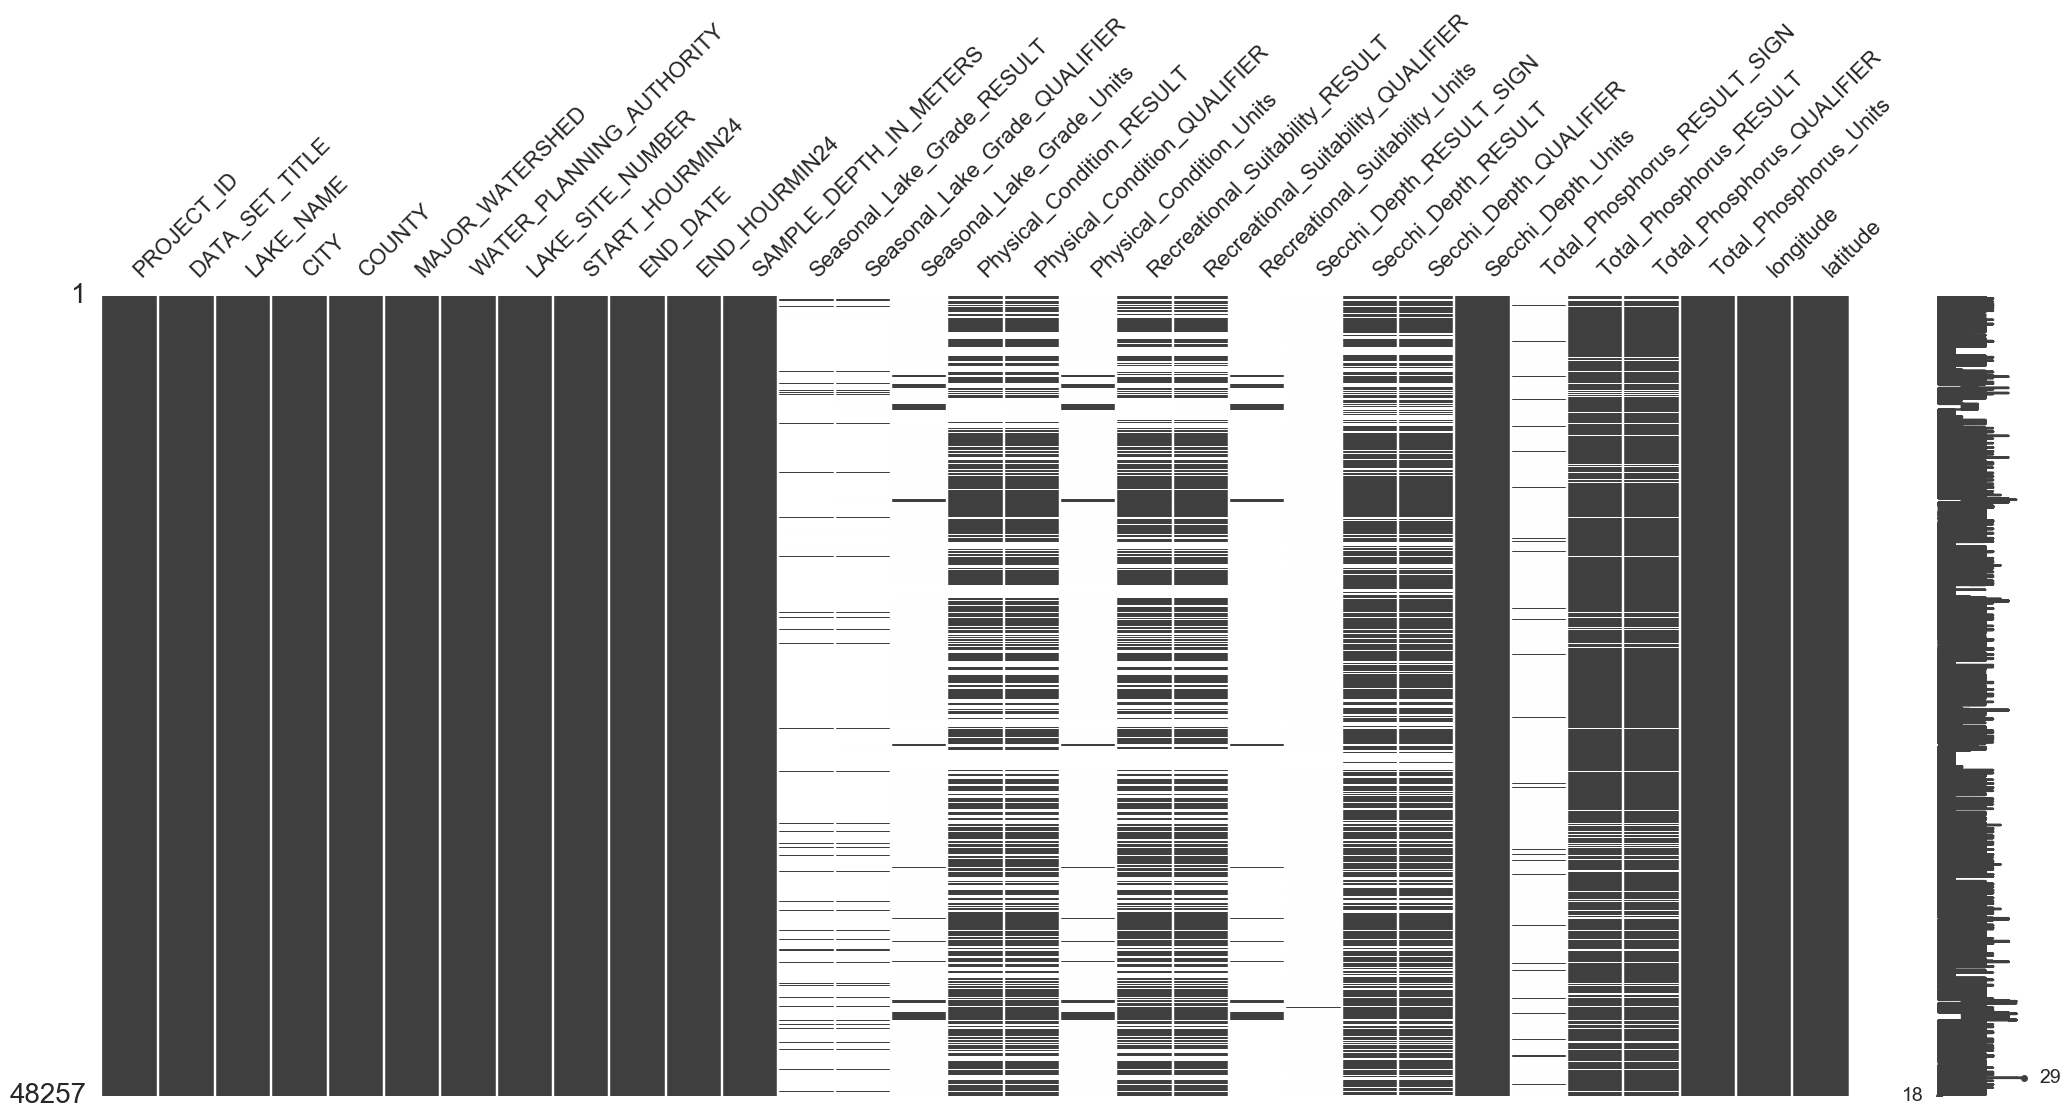

In [168]:
msno.matrix(lake_qual)

In [169]:
pandas_profiling.ProfileReport(lake_qual)

Number of variables,33
Number of observations,48257
Total Missing (%),27.2%
Total size in memory,12.1 MiB
Average record size in memory,264.0 B
Numeric,10
Categorical,19
Date,2
Text (Unique),0
Rejected,2
Distinct count,113


**We only need 2014 data. Let's filter to that first**

In [172]:
lake_qual = lake_qual[lake_qual['END_DATE'].dt.year == 2014]
lake_qual.shape

(2109, 31)

**Join the data sets together on **`LAKE_NAME`

In [285]:
result = precise_matches.reset_index().merge(lake_qual, on='LAKE_NAME').set_index(['PIN'])
result.head()

,COUNTY_ID,ACRES_POLY,AGPRE_ENRD,AGPRE_EXPD,AG_PRESERV,BASEMENT,BLDG_NUM,BLOCK,CITY_x,CITY_USPS,...,Secchi_Depth_RESULT_SIGN,Secchi_Depth_RESULT,Secchi_Depth_QUALIFIER,Secchi_Depth_Units,Total_Phosphorus_RESULT_SIGN,Total_Phosphorus_RESULT,Total_Phosphorus_QUALIFIER,Total_Phosphorus_Units,longitude,latitude
PIN,,,,,,,,,,,,,,,,,,,,,
053-2902924330011,053,0.15,NaN,NaN,N,NaN,1944,003,MINNEAPOLIS,MINNEAPOLIS,...,NaN,NaN,NaN,m,NaN,NaN,NaN,mg/L,-93.513622,44.595631
053-2902924330011,053,0.15,NaN,NaN,N,NaN,1944,003,MINNEAPOLIS,MINNEAPOLIS,...,NaN,NaN,NaN,m,NaN,NaN,NaN,mg/L,-93.513622,44.595631
053-2902924330011,053,0.15,NaN,NaN,N,NaN,1944,003,MINNEAPOLIS,MINNEAPOLIS,...,NaN,1.3,Approved,m,NaN,0.055,Approved,mg/L,-93.513622,44.595631
053-2902924330011,053,0.15,NaN,NaN,N,NaN,1944,003,MINNEAPOLIS,MINNEAPOLIS,...,NaN,NaN,NaN,m,NaN,0.050,Approved,mg/L,-93.513622,44.595631
053-2902924330011,053,0.15,NaN,NaN,N,NaN,1944,003,MINNEAPOLIS,MINNEAPOLIS,...,NaN,1.4,Approved,m,NaN,0.027,Approved,mg/L,-93.513622,44.595631


**This inflated our data since there is an entry for every 2wks in 2014.**

**Lot of NaN columns, this is due to how each city collects and reports data around tax parcels**

In [286]:
result.shape

(4576, 99)

In [287]:
result = result.dropna(axis=1, how='all')

In [288]:
result.shape

(4576, 66)

# Geospatial Calculations

**Some lakes have multiple monitoring stations. You might want to use the data that is closest to the parcel.**

**Let's just do a simple calculation from the center of each parcel to the Lat/Long of the Monitoring Site**

In [289]:
result['Parcel_Centroid'] = result.centroid
result['Parcel_Centroid'].head()

PIN
053-2902924330011    POINT (474420.2918534343 4978995.538410055)
053-2902924330011    POINT (474420.2918534343 4978995.538410055)
053-2902924330011    POINT (474420.2918534343 4978995.538410055)
053-2902924330011    POINT (474420.2918534343 4978995.538410055)
053-2902924330011    POINT (474420.2918534343 4978995.538410055)
Name: Parcel_Centroid, dtype: object

**Weird, those don't look like any type of GPS coords I've seen.**

**GIS files use different 'datums' to set the origin of their coordinate systems. We will need to convert this.**

**This [GIS.stackexchange](http://gis.stackexchange.com/a/722) goes over the concept in detail. And yes... there is a Stack Overflow equivalent for GIS...**

In [290]:
# what is the starting projection
result.crs

{'init': 'epsg:26915'}

**Convert the projection to Normal Lat/Long**

In [291]:
result = result.to_crs({'init': 'epsg:4326'})

In [292]:
result['Parcel_Centroid'] = result.centroid
result['Parcel_Centroid'].head()

PIN
053-2902924330011    POINT (-93.324349184036 44.96393792859692)
053-2902924330011    POINT (-93.324349184036 44.96393792859692)
053-2902924330011    POINT (-93.324349184036 44.96393792859692)
053-2902924330011    POINT (-93.324349184036 44.96393792859692)
053-2902924330011    POINT (-93.324349184036 44.96393792859692)
Name: Parcel_Centroid, dtype: object

In [293]:
result.head()

,COUNTY_ID,ACRES_POLY,AG_PRESERV,BLDG_NUM,BLOCK,CITY_x,CITY_USPS,EMV_BLDG,EMV_LAND,EMV_TOTAL,...,Recreational_Suitability_QUALIFIER,Secchi_Depth_RESULT,Secchi_Depth_QUALIFIER,Secchi_Depth_Units,Total_Phosphorus_RESULT,Total_Phosphorus_QUALIFIER,Total_Phosphorus_Units,longitude,latitude,Parcel_Centroid
PIN,,,,,,,,,,,,,,,,,,,,,
053-2902924330011,053,0.15,N,1944,003,MINNEAPOLIS,MINNEAPOLIS,265300.0,276700.0,542000.0,...,NaN,NaN,NaN,m,NaN,NaN,mg/L,-93.513622,44.595631,POINT (-93.324349184036 44.96393792859692)
053-2902924330011,053,0.15,N,1944,003,MINNEAPOLIS,MINNEAPOLIS,265300.0,276700.0,542000.0,...,NaN,NaN,NaN,m,NaN,NaN,mg/L,-93.513622,44.595631,POINT (-93.324349184036 44.96393792859692)
053-2902924330011,053,0.15,N,1944,003,MINNEAPOLIS,MINNEAPOLIS,265300.0,276700.0,542000.0,...,Approved,1.3,Approved,m,0.055,Approved,mg/L,-93.513622,44.595631,POINT (-93.324349184036 44.96393792859692)
053-2902924330011,053,0.15,N,1944,003,MINNEAPOLIS,MINNEAPOLIS,265300.0,276700.0,542000.0,...,NaN,NaN,NaN,m,0.050,Approved,mg/L,-93.513622,44.595631,POINT (-93.324349184036 44.96393792859692)
053-2902924330011,053,0.15,N,1944,003,MINNEAPOLIS,MINNEAPOLIS,265300.0,276700.0,542000.0,...,Approved,1.4,Approved,m,0.027,Approved,mg/L,-93.513622,44.595631,POINT (-93.324349184036 44.96393792859692)


**Right now monitoring station coords are in into columns, need to convert that into a point.**

In [294]:
from shapely.geometry import Point

result['station_coords'] = [Point(xy) for xy in zip(result['longitude'], result['latitude'])]
# remove the old columns
drop_cols = ['latitude', 'longitude']
result = result.drop(drop_cols, axis=1)

result['station_coords'].head()

PIN
053-2902924330011    POINT (-93.51362198 44.59563088)
053-2902924330011    POINT (-93.51362198 44.59563088)
053-2902924330011    POINT (-93.51362198 44.59563088)
053-2902924330011    POINT (-93.51362198 44.59563088)
053-2902924330011    POINT (-93.51362198 44.59563088)
Name: station_coords, dtype: object

In [295]:
def calc_dist(row):
    dist_to_station = Point.distance(row['Parcel_Centroid'], row['station_coords'])
    return dist_to_station

result['dist_to_station'] = result.apply(calc_dist, axis=1)

result['dist_to_station'].head()

PIN
053-2902924330011    0.414095
053-2902924330011    0.414095
053-2902924330011    0.414095
053-2902924330011    0.414095
053-2902924330011    0.414095
Name: dist_to_station, dtype: float64

**Hmmm those look wrong... Well its actually whatever the distance unit that degrees of lat/long would provide as units. A better way would have been to convert the Station Lat/Long to **`epsg:26915`** and then the units would have been in meters.

**Will fix this is an update to this notebook.**

**Now we just want the data were its the closest to the point.**

In [296]:
# group by the PIN key, which would be duplicated for each station and take the minimum
min_dist_idx = result['dist_to_station'].groupby([result.index.get_level_values(0)]).min()

# use the index values to filter the result dataframe
min_dist = result.iloc[min_dist_idx]
min_dist.head()

C:\Anaconda3\lib\site-packages\pandas\indexes\base.py:1275: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  result = getitem(key)


,COUNTY_ID,ACRES_POLY,AG_PRESERV,BLDG_NUM,BLOCK,CITY_x,CITY_USPS,EMV_BLDG,EMV_LAND,EMV_TOTAL,...,Recreational_Suitability_QUALIFIER,Secchi_Depth_RESULT,Secchi_Depth_QUALIFIER,Secchi_Depth_Units,Total_Phosphorus_RESULT,Total_Phosphorus_QUALIFIER,Total_Phosphorus_Units,Parcel_Centroid,station_coords,dist_to_station
PIN,,,,,,,,,,,,,,,,,,,,,
053-2902924330011,053,0.15,N,1944,003,MINNEAPOLIS,MINNEAPOLIS,265300.0,276700.0,542000.0,...,NaN,NaN,NaN,m,NaN,NaN,mg/L,POINT (-93.324349184036 44.96393792859692),POINT (-93.51362198 44.59563088),0.414095
053-2902924330011,053,0.15,N,1944,003,MINNEAPOLIS,MINNEAPOLIS,265300.0,276700.0,542000.0,...,NaN,NaN,NaN,m,NaN,NaN,mg/L,POINT (-93.324349184036 44.96393792859692),POINT (-93.51362198 44.59563088),0.414095
053-2902924330011,053,0.15,N,1944,003,MINNEAPOLIS,MINNEAPOLIS,265300.0,276700.0,542000.0,...,NaN,NaN,NaN,m,NaN,NaN,mg/L,POINT (-93.324349184036 44.96393792859692),POINT (-93.51362198 44.59563088),0.414095
053-2902924330011,053,0.15,N,1944,003,MINNEAPOLIS,MINNEAPOLIS,265300.0,276700.0,542000.0,...,NaN,NaN,NaN,m,NaN,NaN,mg/L,POINT (-93.324349184036 44.96393792859692),POINT (-93.51362198 44.59563088),0.414095
053-2902924330011,053,0.15,N,1944,003,MINNEAPOLIS,MINNEAPOLIS,265300.0,276700.0,542000.0,...,NaN,NaN,NaN,m,NaN,NaN,mg/L,POINT (-93.324349184036 44.96393792859692),POINT (-93.51362198 44.59563088),0.414095


In [300]:
drop_cols = ['Parcel_Centroid', 'station_coords']
min_dist = min_dist.drop(drop_cols, axis=1)

# Writing Data Out

**GeoDataFrames can be exported to many different standard formats.**

In [302]:
# Shape files complain about timestamps
min_dist['END_DATE'] = min_dist['END_DATE'].astype('str')

file_name = './data/results'

min_dist.to_file(file_name)